In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv


In [88]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Objectives:
- predicting the likelihood of a patient developing lung cancer
- identifying risk factors for lung cancer
- determining the most effective treatment for a patient with lung cancer

In [3]:
data = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")

In [4]:
col2drop=["index","Patient Id"]
data=data.drop(col2drop, axis=1)

In [5]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
def plot_histograms(df):
    df.hist(bins=20, figsize=(35, 25), edgecolor='black')
    plt.suptitle('Distribution of Features')
    plt.show()

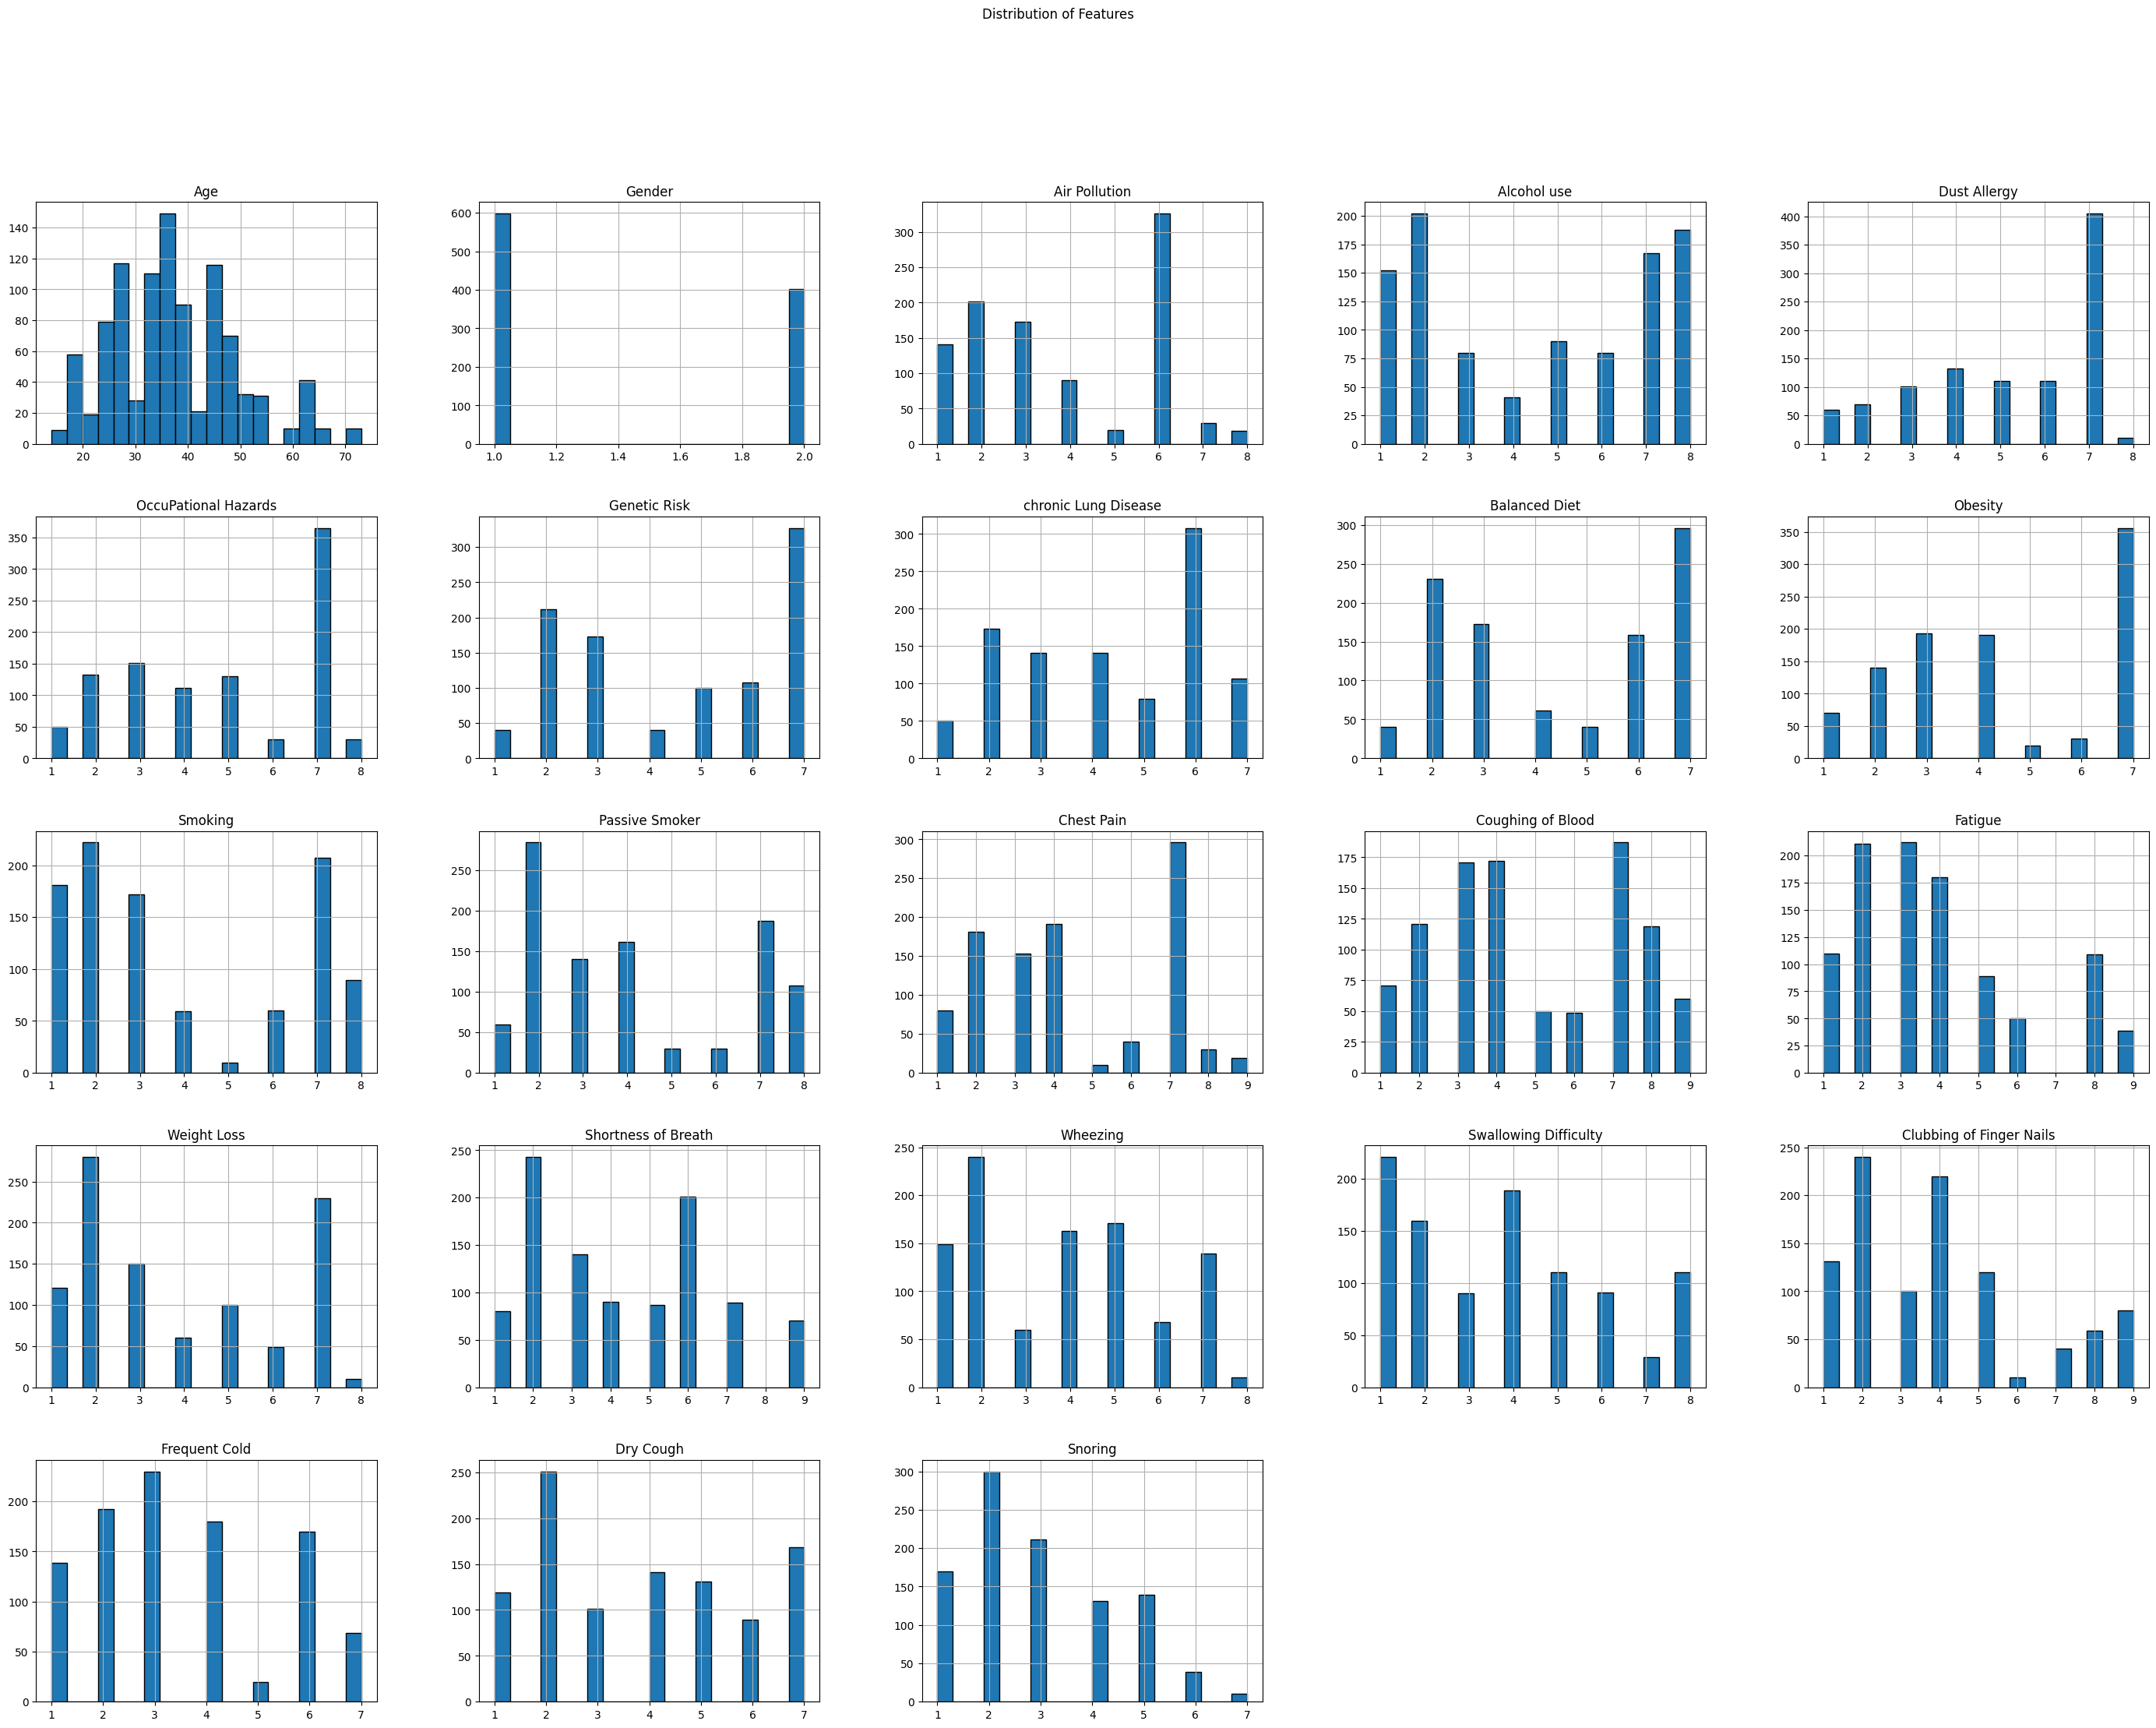

In [7]:
plot_histograms(data)

In [9]:
# Find pairs of highly correlated features
high_corr_threshold = 0.9
high_corr_pairs = np.where(corr_matrix > high_corr_threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated pairs of features:")
for pair in high_corr_pairs:
    print(pair)

Highly correlated pairs of features:


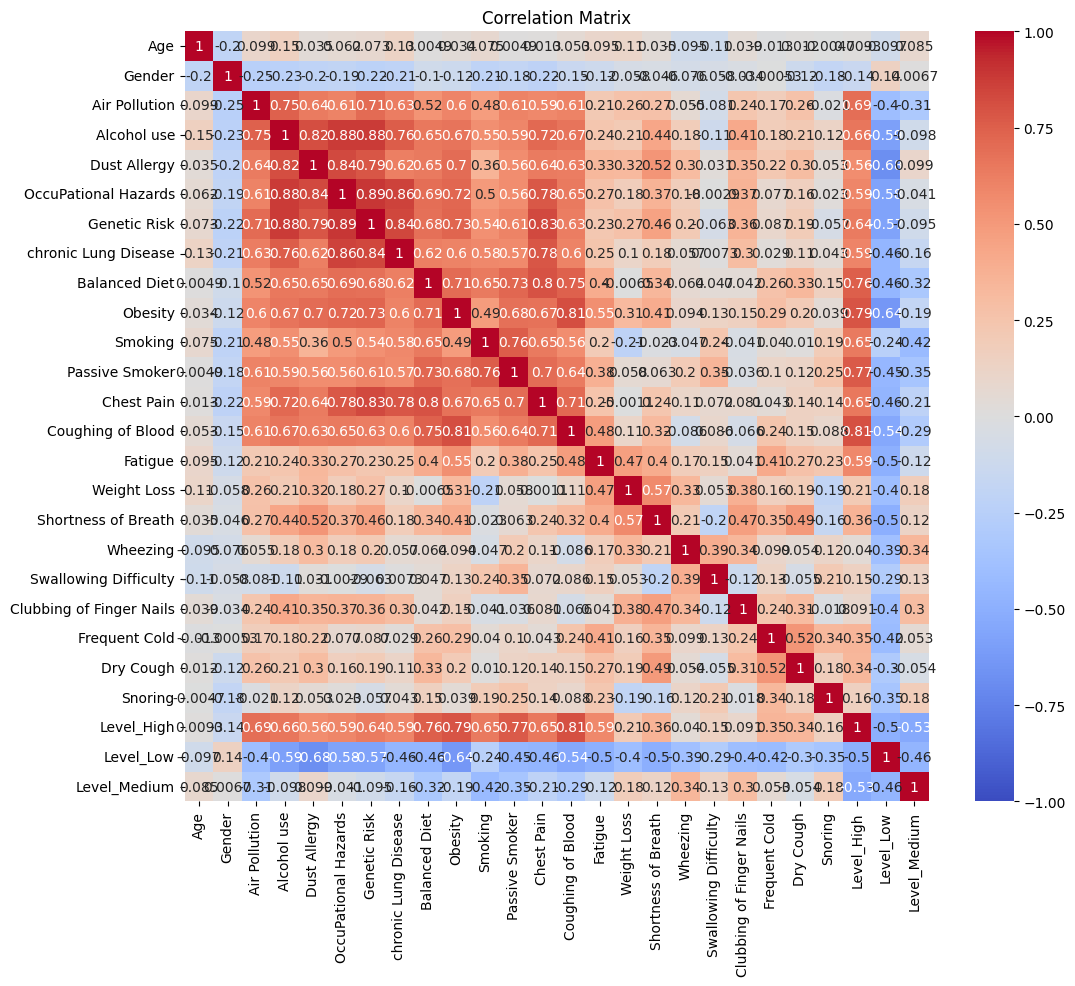

In [8]:
# Convert categorical variables to numerical representations (one-hot encoding)
df_encoded = pd.get_dummies(data)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

I  will not drop any feature here

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

By the elbow method we can see the optimal values for K. The silhouette score helps understand if the Clusters are well defined or not. Other options are also available.

- Silhouette Score: Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value ranges from -1 to 1, where a higher value indicates better-defined clusters.

- Metrics like the Davies-Bouldin Index or Dunn Index can also be adapted for categorical data clustering evaluation. This is an internal metrics evaluation.


In [35]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 257, cost: 15127.0
Run 1, iteration: 2/100, moves: 23, cost: 15126.0
Run 1, iteration: 3/100, moves: 6, cost: 15126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 277, cost: 15354.0
Run 2, iteration: 2/100, moves: 144, cost: 15094.0
Run 2, iteration: 3/100, moves: 14, cost: 15087.0
Run 2, iteration: 4/100, moves: 0, cost: 15087.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 241, cost: 15221.0
Run 3, iteration: 2/100, moves: 89, cost: 15094.0
Run 3, iteration: 3/100, moves: 11, cost: 15087.0
Run 3, iteration: 4/100, moves: 0, cost: 15087.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 43, cost: 15039.0
Run 4, iteration: 2/100, moves: 0, cost: 15039.0
Init: initializing centroids
I

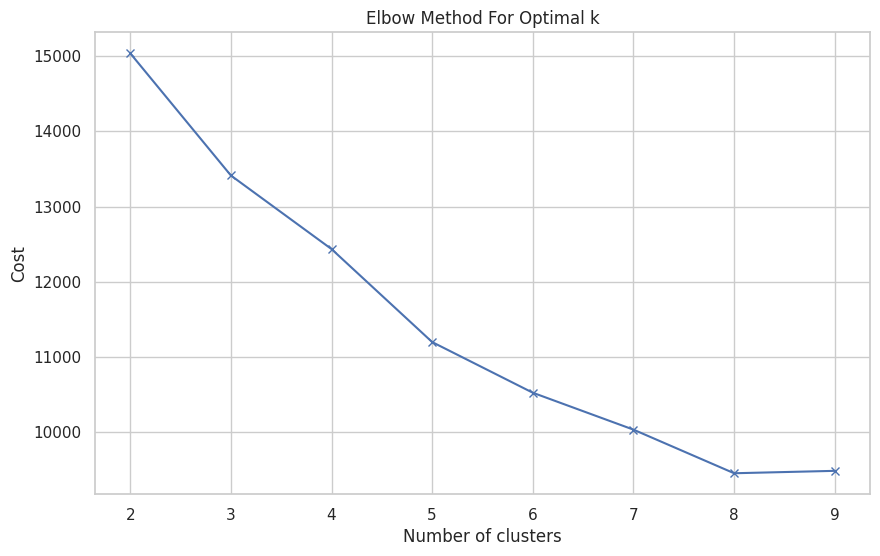

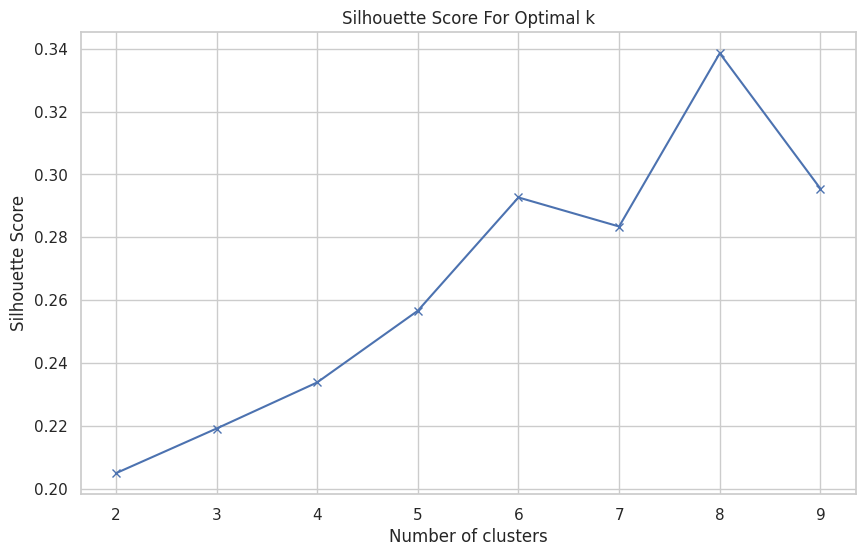

In [46]:
# Elbow method to find the optimal number of clusters
cost = []
sil_scores = []
K = range(2, 10)

for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(df_encoded)
    cost.append(km.cost_)
    sil_score = categorical_silhouette_score(df_encoded, clusters)
    sil_scores.append(sil_score)

# Plot the cost for the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

In [51]:
# Replace "level" with Integer
print('Cancer Levels: ', data['Level'].unique())

data["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', data['Level'].unique())

Cancer Levels:  [1 2 0]
Cancer Levels:  [1 2 0]


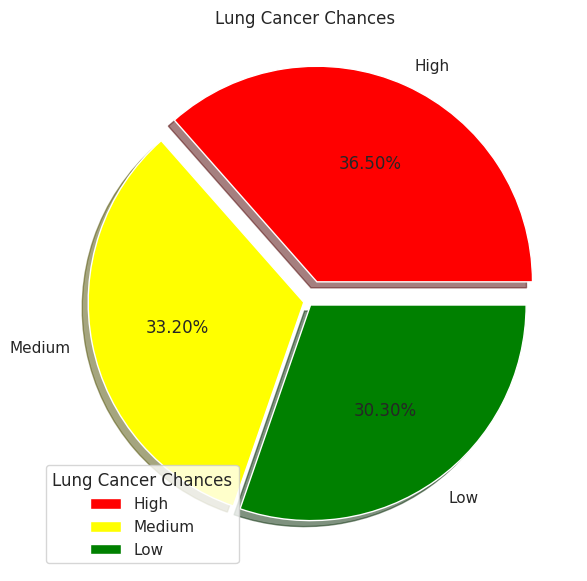

In [48]:
plt.figure(figsize = (15,7))
colors = ['red', 'yellow', 'green']
plt.title("Lung Cancer Chances ")
plt.pie(data['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True, colors = colors)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


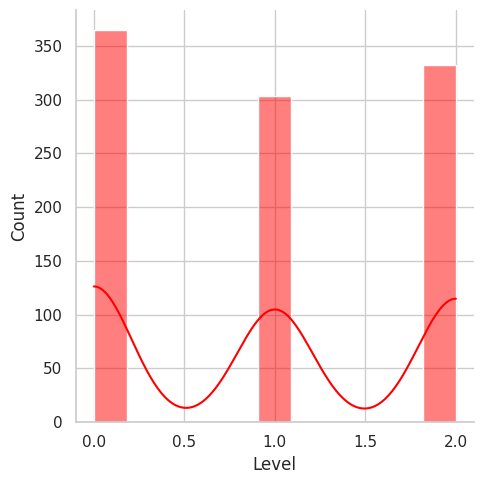

In [53]:
sns.displot(data['Level'], kde=True, color = 'red')

In [54]:
y = data.pop('Level')
x = data

Train-Test-Split 

In [56]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
results = pd.DataFrame(columns = ['model', 'f1_train', 'f1_test', 'r2_train', 'r2_test'])

In [69]:
#Helper functions to evaluate the performances.
def test_performance(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    print("R2 Score : ", r2_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    
    cm.plot( cmap='plasma', ax=None, xticks_rotation='horizontal')
    print("\n")

    
def train_performance(y_pred_train):
        print("Train Data Metrics:")
        print("Precision : ", precision_score(y_train, y_pred_train, average='micro'))
        print("Recall : ", recall_score(y_train, y_pred_train, average='micro'))
        print("Accuracy : ", accuracy_score(y_train, y_pred_train))
        print("F1 Score : ", f1_score(y_train, y_pred_train, average='micro'))
        print("R2 Score : ", r2_score(y_train, y_pred_train))
        print("\n")
    

In [60]:
from sklearn.model_selection import GridSearchCV

param_RF = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [2,3,4,5],
    'criterion':['gini'],
    'min_samples_split': [2, 3],  
    'min_samples_leaf': [2, 3],
    'random_state' : [42],
    'max_samples': [0.4]
    
}

In [61]:
%%time
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RF, cv=5)
model.fit(x_train, y_train)

best_params = model.best_params_
print("Best Parameters:", best_params)
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
CPU times: user 43.1 s, sys: 346 ms, total: 43.4 s
Wall time: 43.4 s


RandomForestClassifier(max_depth=4, max_samples=0.4, min_samples_leaf=2,
                       n_estimators=50, random_state=42)

Train Data Metrics:
Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0
R2 Score :  1.0


Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0
R2 Score :  1.0

 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************





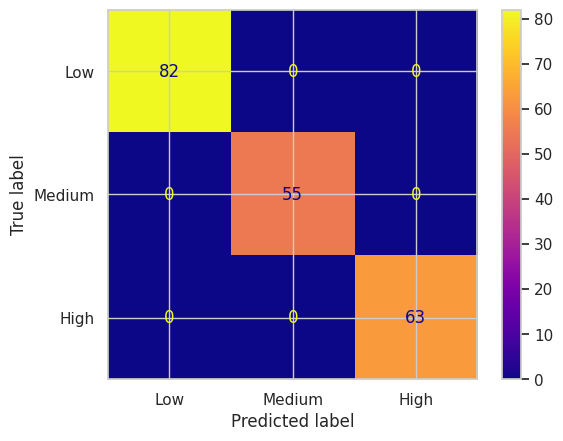

In [70]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, r2_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# Train
train_predictions = model_rf.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_rf.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Result
train_performance(train_predictions)
test_performance(test_predictions)

# Save
results.loc[0,'model'] = 'RandomForest Classifier'
results.loc[0,'f1_train'] = f1_train
results.loc[0,'f1_test'] = f1_test
results.loc[0,'r2_train'] = r2_train
results.loc[0,'r2_test'] = r2_test
results.loc[0,'short'] = 'RF'
score_model_rf = model_rf.score(x_test, y_test)

In [71]:
# Feature importance for Random Forest Clasifire
feature_importances_model_rf = pd.DataFrame(x_train.columns)
feature_importances_model_rf.columns = ['feature']
feature_importances_model_rf["score_model_rf"] = pd.Series(model_rf.feature_importances_)
feature_importances_model_rf.sort_values(by='score_model_rf', ascending=False)

,feature,score_model_rf
13,Coughing of Blood,0.117994
9,Obesity,0.106197
11,Passive Smoker,0.088613
17,Wheezing,0.080600
16,Shortness of Breath,0.064577
14,Fatigue,0.060933
8,Balanced Diet,0.056698
12,Chest Pain,0.051109
3,Alcohol use,0.046067
4,Dust Allergy,0.034364


In [74]:
from sklearn.neural_network import MLPClassifier
params_mlp1 ={'hidden_layer_sizes': 100,
            'random_state': 2,
            'alpha': 0.001,
            'activation': 'relu',
            'learning_rate_init': 0.001,
            'max_iter': 100,
             'batch_size': 32,
             'early_stopping':True,
             'validation_fraction': 0.1,
             'tol': 1e-4
            }

params_mlp2 ={'hidden_layer_sizes': [50, 75, 100],
             'random_state': [2],
             'alpha': [0.01, 0.001],
             'activation': ['relu', 'tanh'],
             'learning_rate_init': [0.001, 0.01],
             'max_iter': [100, 200, 300],
             'solver': ['adam', 'lbfgs'],
             'early_stopping': [True],
             'validation_fraction': [0.1, 0.2],
             
            }

params_mlp ={'hidden_layer_sizes': [50, 75, 100],
             'learning_rate_init': [0.001],
             'max_iter': [100, 200, 300],
             'solver': ['adam'],
             'early_stopping': [True],
             'random_state' : [42]}

In [75]:
%%time
model_tuning = GridSearchCV(estimator=MLPClassifier(), param_grid=params_mlp, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_mlp = MLPClassifier(**best_params)
model_mlp.fit(x_train, y_train)

Best Parameters: {'early_stopping': True, 'hidden_layer_sizes': 75, 'learning_rate_init': 0.001, 'max_iter': 100, 'random_state': 42, 'solver': 'adam'}
CPU times: user 19.8 s, sys: 12.4 s, total: 32.1 s
Wall time: 10.4 s


MLPClassifier(early_stopping=True, hidden_layer_sizes=75, max_iter=100,
              random_state=42)

Train Data Metrics:
Precision :  0.84875
Recall :  0.84875
Accuracy :  0.84875
F1 Score :  0.84875
R2 Score :  0.6828302416833558


Precision :  0.855
Recall :  0.855
Accuracy :  0.855
F1 Score :  0.855
R2 Score :  0.7555780578930829

 [[81  0  1]
 [ 2 30 23]
 [ 1  2 60]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        82
           1       0.94      0.55      0.69        55
           2       0.71      0.95      0.82        63

    accuracy                           0.85       200
   macro avg       0.87      0.83      0.83       200
weighted avg       0.88      0.85      0.85       200

******************************************************





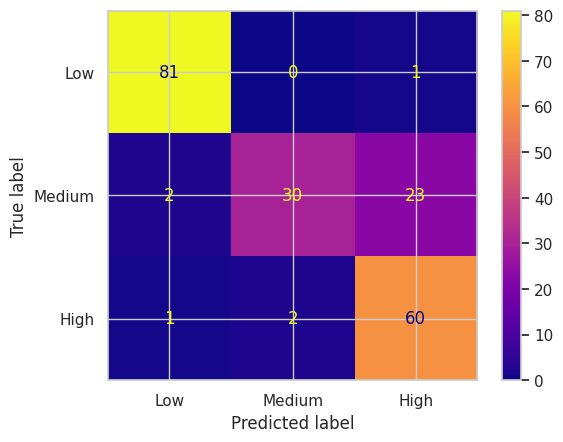

In [77]:
# Train
train_predictions = model_mlp.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_mlp.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Result
train_performance(train_predictions)
test_performance(test_predictions)

# Save
results.loc[5,'model'] = 'MLP Classifier'
results.loc[5,'f1_train'] = f1_train
results.loc[5,'f1_test'] = f1_test
results.loc[5,'r2_train'] = r2_train
results.loc[5,'r2_test'] = r2_test
results.loc[5,'short'] = 'MLP'
score_model_mlp = model_mlp.score(x_test, y_test)

In [84]:
params_DT2 ={'max_depth': [3],
            'min_samples_split':  [2],
            'min_samples_leaf':  [1],
            'max_features': ['sqrt'],
            }

params_DT1 ={'max_depth': [1, 2, 3],
            'min_samples_split': [1, 2, 3],
            'min_samples_leaf': [0, 1, 2],
            'max_features': ['sqrt', 'log2', 'auto'],
            'max_leaf_nodes': [ 5, 10, 15, 17],
            'random_state' : [42],
            'min_impurity_decrease': [0, 0.001, 0.01],
            'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
           }

params_DT ={'max_depth': [3, 4],
            'min_samples_split': [1, 2, 3],
            'min_samples_leaf': [0, 1, 2],
            'max_features': ['sqrt', 'log2', 'auto'],
            'max_leaf_nodes': [ 5, 10, 15, 17],
            'random_state' : [42]}

In [89]:
from sklearn.tree import DecisionTreeClassifier

model_tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_DT, cv=5)
model_tuning.fit(x_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(x_train, y_train)

Best Parameters: {'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


DecisionTreeClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       random_state=42)

Train Data Metrics:
Precision :  0.9625
Recall :  0.9625
Accuracy :  0.9625
F1 Score :  0.9625000000000001
R2 Score :  0.9021304745765784


Precision :  0.95
Recall :  0.95
Accuracy :  0.95
F1 Score :  0.9500000000000001
R2 Score :  0.8882642550368378

 [[80  0  2]
 [ 2 47  6]
 [ 0  0 63]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        82
           1       1.00      0.85      0.92        55
           2       0.89      1.00      0.94        63

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200

******************************************************





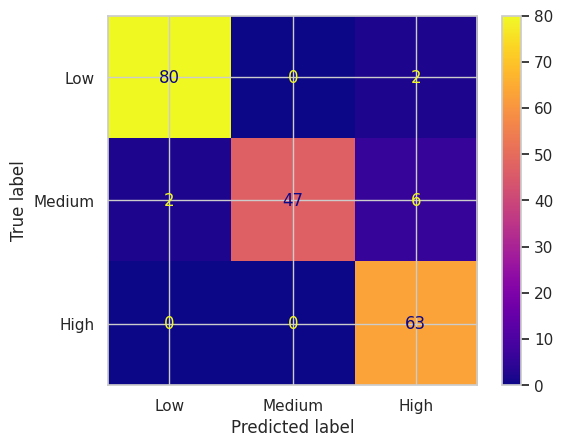

In [90]:
# Train
train_predictions = model_dt.predict(x_train)
r2_train = r2_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions, average = 'micro')

# Test
test_predictions = model_dt.predict(x_test)
r2_test = r2_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions, average = 'micro')

#Result
train_performance(train_predictions)
test_performance(test_predictions)

# Save
results.loc[3,'model'] = 'DecisionTree Classifier'
results.loc[3,'f1_train'] = f1_train
results.loc[3,'f1_test'] = f1_test
results.loc[3,'r2_train'] = r2_train
results.loc[3,'r2_test'] = r2_test
results.loc[3,'short'] = 'DT'
score_model_dt = model_dt.score(x_test, y_test)

[Text(0.46153846153846156, 0.9, 'x[6] <= 4.5\ngini = 0.666\nsamples = 800\nvalue = [283, 248, 269]'),
 Text(0.3076923076923077, 0.7, 'x[16] <= 5.5\ngini = 0.483\nsamples = 382\nvalue = [0, 226, 156]'),
 Text(0.23076923076923078, 0.5, 'x[22] <= 4.5\ngini = 0.381\nsamples = 304\nvalue = [0, 226, 78]'),
 Text(0.15384615384615385, 0.3, 'x[17] <= 4.5\ngini = 0.242\nsamples = 263\nvalue = [0, 226, 37]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 226\nvalue = [0, 226, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]'),
 Text(0.38461538461538464, 0.5, 'gini = 0.0\nsamples = 78\nvalue = [0, 0, 78]'),
 Text(0.6153846153846154, 0.7, 'x[10] <= 1.5\ngini = 0.466\nsamples = 418\nvalue = [283, 22, 113]'),
 Text(0.5384615384615384, 0.5, 'gini = 0.0\nsamples = 53\nvalue = [0, 0, 53]'),
 Text(0.6923076923076923, 0.5, 'x[3] <= 6.5\ngini = 0.368\nsamples = 365\nvalue = [283, 22, 

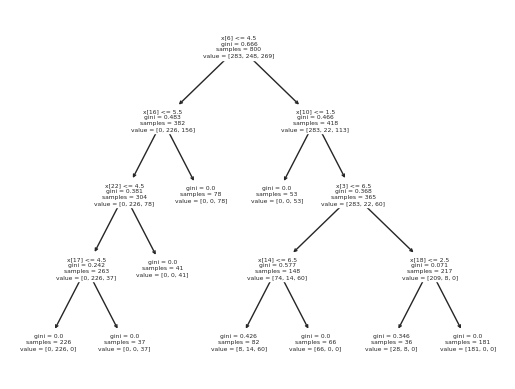

In [106]:
from sklearn import tree
tree.plot_tree(model_dt)

In [107]:
display(results)

,model,f1_train,f1_test,r2_train,r2_test,short
0,RandomForest Classifier,1.0,1.0,1.0,1.0,RF
5,MLP Classifier,0.84875,0.855,0.68283,0.755578,MLP
3,DecisionTree Classifier,0.9625,0.95,0.90213,0.888264,DT
